# import libraries

In [894]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import plotly.express as px

# load the data

In [896]:
df = pd.read_csv("ds_salaries.csv")

# Explore the  data

In [898]:
df.shape

(607, 12)

In [899]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### employee_residence and company_location are not the same

In [901]:
for i, j in zip(df["employee_residence"],df["company_location"]):
    if i != j:
        print([i,j])

['PL', 'GB']
['PT', 'US']
['GR', 'US']
['PH', 'US']
['PK', 'DE']
['RU', 'US']
['ES', 'US']
['FR', 'LU']
['IN', 'US']
['GB', 'CA']
['IT', 'PL']
['BG', 'US']
['GR', 'DK']
['BR', 'US']
['DE', 'US']
['HU', 'US']
['PK', 'US']
['ES', 'RO']
['VN', 'US']
['BR', 'US']
['SG', 'IL']
['IN', 'US']
['RO', 'US']
['VN', 'GB']
['FR', 'ES']
['RO', 'GB']
['US', 'FR']
['IN', 'US']
['DE', 'AT']
['FR', 'US']
['IT', 'US']
['HK', 'GB']
['IN', 'CH']
['US', 'CA']
['IN', 'AS']
['RS', 'DE']
['PR', 'US']
['NL', 'DE']
['JE', 'CN']
['FR', 'DE']
['AR', 'MX']
['CA', 'US']
['TN', 'CZ']
['MY', 'US']
['BR', 'US']
['PK', 'DE']
['JP', 'MY']
['BO', 'US']
['RU', 'US']
['PT', 'LU']
['IN', 'US']


In [902]:
irrelateve = ["salary", "salary_currency", "Unnamed: 0","employment_type"]
df.drop(irrelateve, axis = 1, inplace = True)

In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   job_title           607 non-null    object
 3   salary_in_usd       607 non-null    int64 
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


In [904]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


In [905]:
def info_data():
    cols = df.columns
    value_counts = [df[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_unique = [df[col].nunique() for col in cols]
    dtypes = [df[col].dtypes for col in cols]
    null = [df[col].isnull().sum() for col in cols]
    duplicated = [df[col].duplicated().sum() for col in cols]
    return pd.DataFrame({"cols":cols, "value_counts":value_counts, "n_unique":n_unique, "dtypes":dtypes, "null":null, "duplicated":duplicated})

In [906]:
info_data()

,cols,value_counts,n_unique,dtypes,null,duplicated
0,work_year,"[2022, 2021, 2020]",3,int64,0,604
1,experience_level,"[SE, MI, EN, EX]",4,object,0,603
2,job_title,"[Data Scientist, Data Engineer, Data Analyst, ...",50,object,0,557
3,salary_in_usd,"[100000, 120000, 150000, 200000, 135000, 17000...",369,int64,0,238
4,employee_residence,"[US, GB, IN, CA, DE, FR, ES, GR, JP, PT]",57,object,0,550
5,remote_ratio,"[100, 0, 50]",3,int64,0,604
6,company_location,"[US, GB, CA, DE, IN, FR, ES, GR, JP, NL]",50,object,0,557
7,company_size,"[M, L, S]",3,object,0,604


### there is no Null values or Outlires

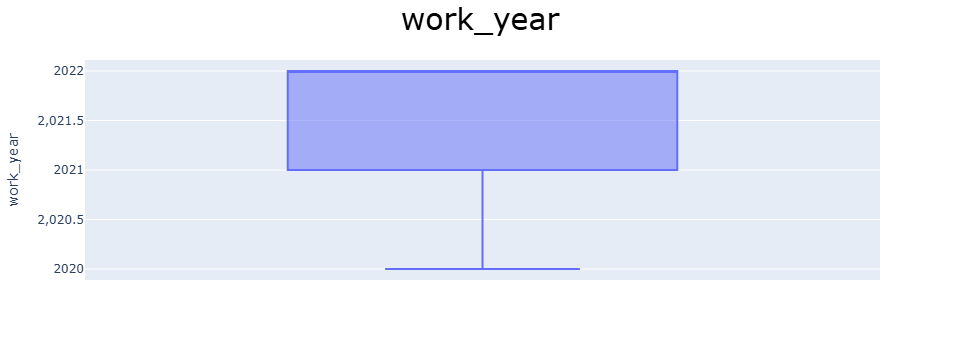

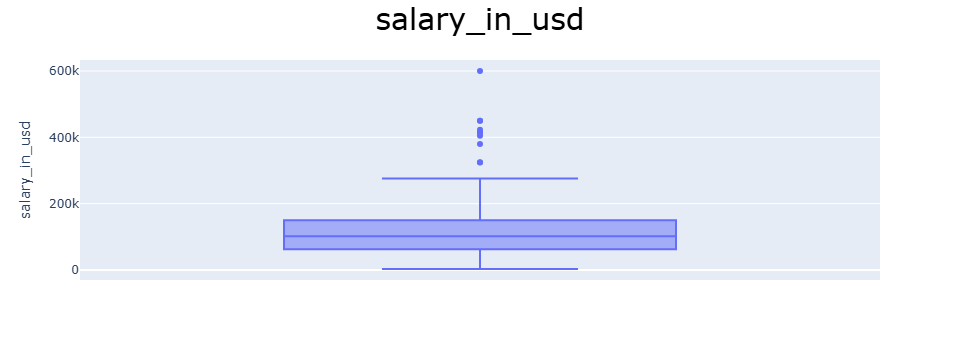

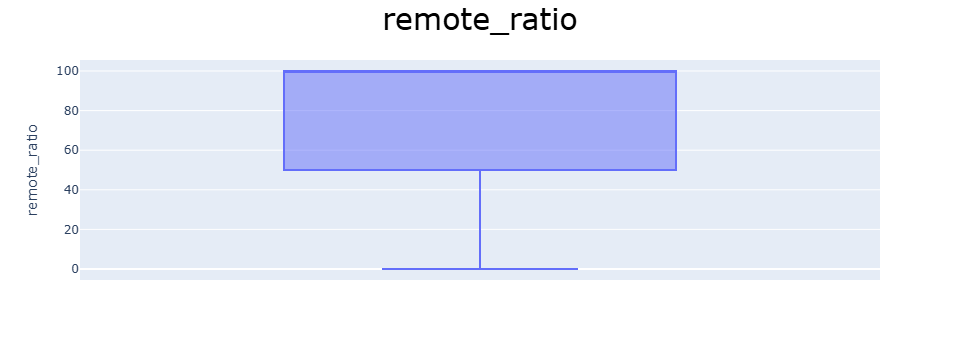

In [908]:
for i in df.select_dtypes(include = "number").columns:
    fig = px.box(df, y = i)
    fig.update_layout(title_text = i,
                 title = {"x" : 0.5 ,"font_size" : 30, "font_color":"black"})
                 
    fig.show()

# handle duplicated

In [910]:
df.duplicated().sum()

42

In [911]:
df.drop_duplicates(inplace = True)

In [912]:
df.reset_index(drop = True)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,79833,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...
560,2022,SE,Data Engineer,154000,US,100,US,M
561,2022,SE,Data Engineer,126000,US,100,US,M
562,2022,SE,Data Analyst,129000,US,0,US,M
563,2022,SE,Data Analyst,150000,US,100,US,M


# corrolation

<Axes: >

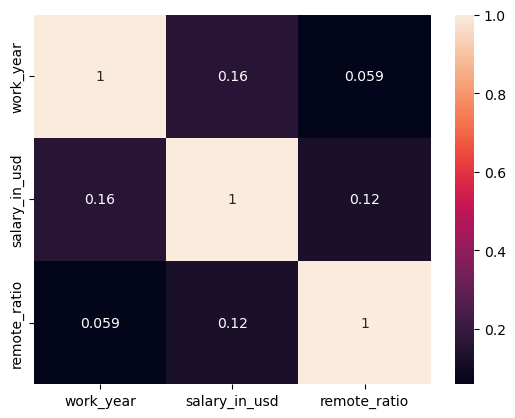

In [914]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

# Date column

In [916]:
"""
from dateutil import parser
df["work_year"] = df["work_year"].apply(lambda x : parser.parse(str(x)) if pd.notna(x) else x)

df["work_year"] = df["work_year"].dt.year

df["work_year"].value_counts()
"""

'\nfrom dateutil import parser\ndf["work_year"] = df["work_year"].apply(lambda x : parser.parse(str(x)) if pd.notna(x) else x)\n\ndf["work_year"] = df["work_year"].dt.year\n\ndf["work_year"].value_counts()\n'

# Ordinal columns

In [918]:
ordinal_columns = ["experience_level", "company_size"]
for i in ordinal_columns:
    ordinal = df.groupby(i)["salary_in_usd"].mean().sort_values(ascending=False)
    print(ordinal)
    df[i] = df[i].map(ordinal.rank().astype(int))
    print(ordinal.rank().astype(int))

experience_level
EX    199392.038462
SE    138374.880658
MI     87792.995192
EN     61643.318182
Name: salary_in_usd, dtype: float64
experience_level
EX    4
SE    3
MI    2
EN    1
Name: salary_in_usd, dtype: int32
company_size
L    118213.880829
M    114807.079310
S     77872.097561
Name: salary_in_usd, dtype: float64
company_size
L    3
M    2
S    1
Name: salary_in_usd, dtype: int32


In [919]:
df["company_size"] = df["company_size"].replace({3:2})

In [920]:
df["company_size"].value_counts()

company_size
2    483
1     82
Name: count, dtype: int64

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    int32 
 2   job_title           565 non-null    object
 3   salary_in_usd       565 non-null    int64 
 4   employee_residence  565 non-null    object
 5   remote_ratio        565 non-null    int64 
 6   company_location    565 non-null    object
 7   company_size        565 non-null    int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 35.3+ KB


In [922]:
info_data()

,cols,value_counts,n_unique,dtypes,null,duplicated
0,work_year,"[2022, 2021, 2020]",3,int64,0,562
1,experience_level,"[3, 2, 1, 4]",4,int32,0,561
2,job_title,"[Data Scientist, Data Engineer, Data Analyst, ...",50,object,0,515
3,salary_in_usd,"[100000, 150000, 120000, 200000, 80000, 135000...",369,int64,0,196
4,employee_residence,"[US, GB, IN, CA, DE, FR, ES, GR, JP, PT]",57,object,0,508
5,remote_ratio,"[100, 0, 50]",3,int64,0,562
6,company_location,"[US, GB, CA, DE, IN, FR, ES, GR, JP, NL]",50,object,0,515
7,company_size,"[2, 1]",2,int32,0,563


## handle object columns with the __Other__ tec

#### job_title

In [925]:
df["job_title"].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [926]:
category = df["job_title"].value_counts().index
values = df["job_title"].value_counts().values

for i, j in zip(category, values):
    if j <= 12:
        df["job_title"] = df["job_title"].replace({i : "other"})

In [927]:
df["job_title"].value_counts()

job_title
other                        177
Data Scientist               130
Data Engineer                121
Data Analyst                  82
Machine Learning Engineer     39
Research Scientist            16
Name: count, dtype: int64

#### employee_residence

In [929]:
df["employee_residence"].value_counts()

employee_residence
US    295
GB     43
IN     30
CA     27
DE     24
FR     18
ES     15
GR     12
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

In [930]:

category = df["employee_residence"].value_counts().index
values = df["employee_residence"].value_counts().values

for i, j in zip(category, values):
    if j <= 7:
        df["employee_residence"] = df["employee_residence"].replace({i : "other"})
        

In [931]:
"""
category = df["employee_residence"].value_counts().index
values = df["employee_residence"].value_counts().values

for i, j in zip(category, values):
    if j <= 30:
        df["employee_residence"] = df["employee_residence"].replace({i : "other2"})
        """

'\ncategory = df["employee_residence"].value_counts().index\nvalues = df["employee_residence"].value_counts().values\n\nfor i, j in zip(category, values):\n    if j <= 30:\n        df["employee_residence"] = df["employee_residence"].replace({i : "other2"})\n        '

In [932]:
df["employee_residence"].value_counts()

employee_residence
US       295
other    101
GB        43
IN        30
CA        27
DE        24
FR        18
ES        15
GR        12
Name: count, dtype: int64

#### company_location

In [934]:
df["company_location"].value_counts()

company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [935]:

category = df["company_location"].value_counts().index
values = df["company_location"].value_counts().values

for i, j in zip(category, values):
    if j <= 6:
        df["company_location"] = df["company_location"].replace({i : "other"})

In [936]:
df["company_location"].value_counts()

company_location
US       318
other     83
GB        46
CA        28
DE        27
IN        24
FR        15
ES        14
GR        10
Name: count, dtype: int64

In [958]:
"""
category = df["company_location"].value_counts().index
values = df["company_location"].value_counts().values

for i, j in zip(category, values):
    if j <= 28:
        df["company_location"] = df["company_location"].replace({i : "other2"})
        """

'\ncategory = df["company_location"].value_counts().index\nvalues = df["company_location"].value_counts().values\n\nfor i, j in zip(category, values):\n    if j <= 28:\n        df["company_location"] = df["company_location"].replace({i : "other2"})\n        '

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    int32 
 2   job_title           565 non-null    object
 3   salary_in_usd       565 non-null    int64 
 4   employee_residence  565 non-null    object
 5   remote_ratio        565 non-null    int64 
 6   company_location    565 non-null    object
 7   company_size        565 non-null    int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 35.3+ KB


# trying to handle object columns with Rank

In [963]:
"""
object_columns = ["company_location", "employee_residence", "salary_currency", "job_title"]
for i in object_columns:
    ordinal = df.groupby(i)["salary_in_usd"].mean().sort_values(ascending=False)
    #print(pd.DataFrame({"ordinal": ordinal, "ordinal.rank()" : ordinal.rank().astype(int)}))
    df[i] = df[i].map(ordinal.rank().astype(int))
    """

'\nobject_columns = ["company_location", "employee_residence", "salary_currency", "job_title"]\nfor i in object_columns:\n    ordinal = df.groupby(i)["salary_in_usd"].mean().sort_values(ascending=False)\n    #print(pd.DataFrame({"ordinal": ordinal, "ordinal.rank()" : ordinal.rank().astype(int)}))\n    df[i] = df[i].map(ordinal.rank().astype(int))\n    '

In [965]:
#ordinal = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

#rank_values = ordinal.rank().astype(int).values

#rank_categories = ordinal.rank().astype(int).index

#rank_categories

#df['job_title'][rank_categories[0]]

#len(rank_categories)

#type(rank_categories)

# One Hot Encoder

In [968]:
object_columns = df.select_dtypes(include = ["object"]).columns
object_columns

Index(['job_title', 'employee_residence', 'company_location'], dtype='object')

In [970]:
df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [ ]:
bool_columns = df.select_dtypes(include = ["bool"]).columns
bool_columns

for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   work_year                            565 non-null    int64
 1   experience_level                     565 non-null    int32
 2   salary_in_usd                        565 non-null    int64
 3   remote_ratio                         565 non-null    int64
 4   company_size                         565 non-null    int32
 5   job_title_Data Engineer              565 non-null    int64
 6   job_title_Data Scientist             565 non-null    int64
 7   job_title_Machine Learning Engineer  565 non-null    int64
 8   job_title_Research Scientist         565 non-null    int64
 9   job_title_other                      565 non-null    int64
 10  employee_residence_DE                565 non-null    int64
 11  employee_residence_ES                565 non-null    int64
 12 

<Axes: >

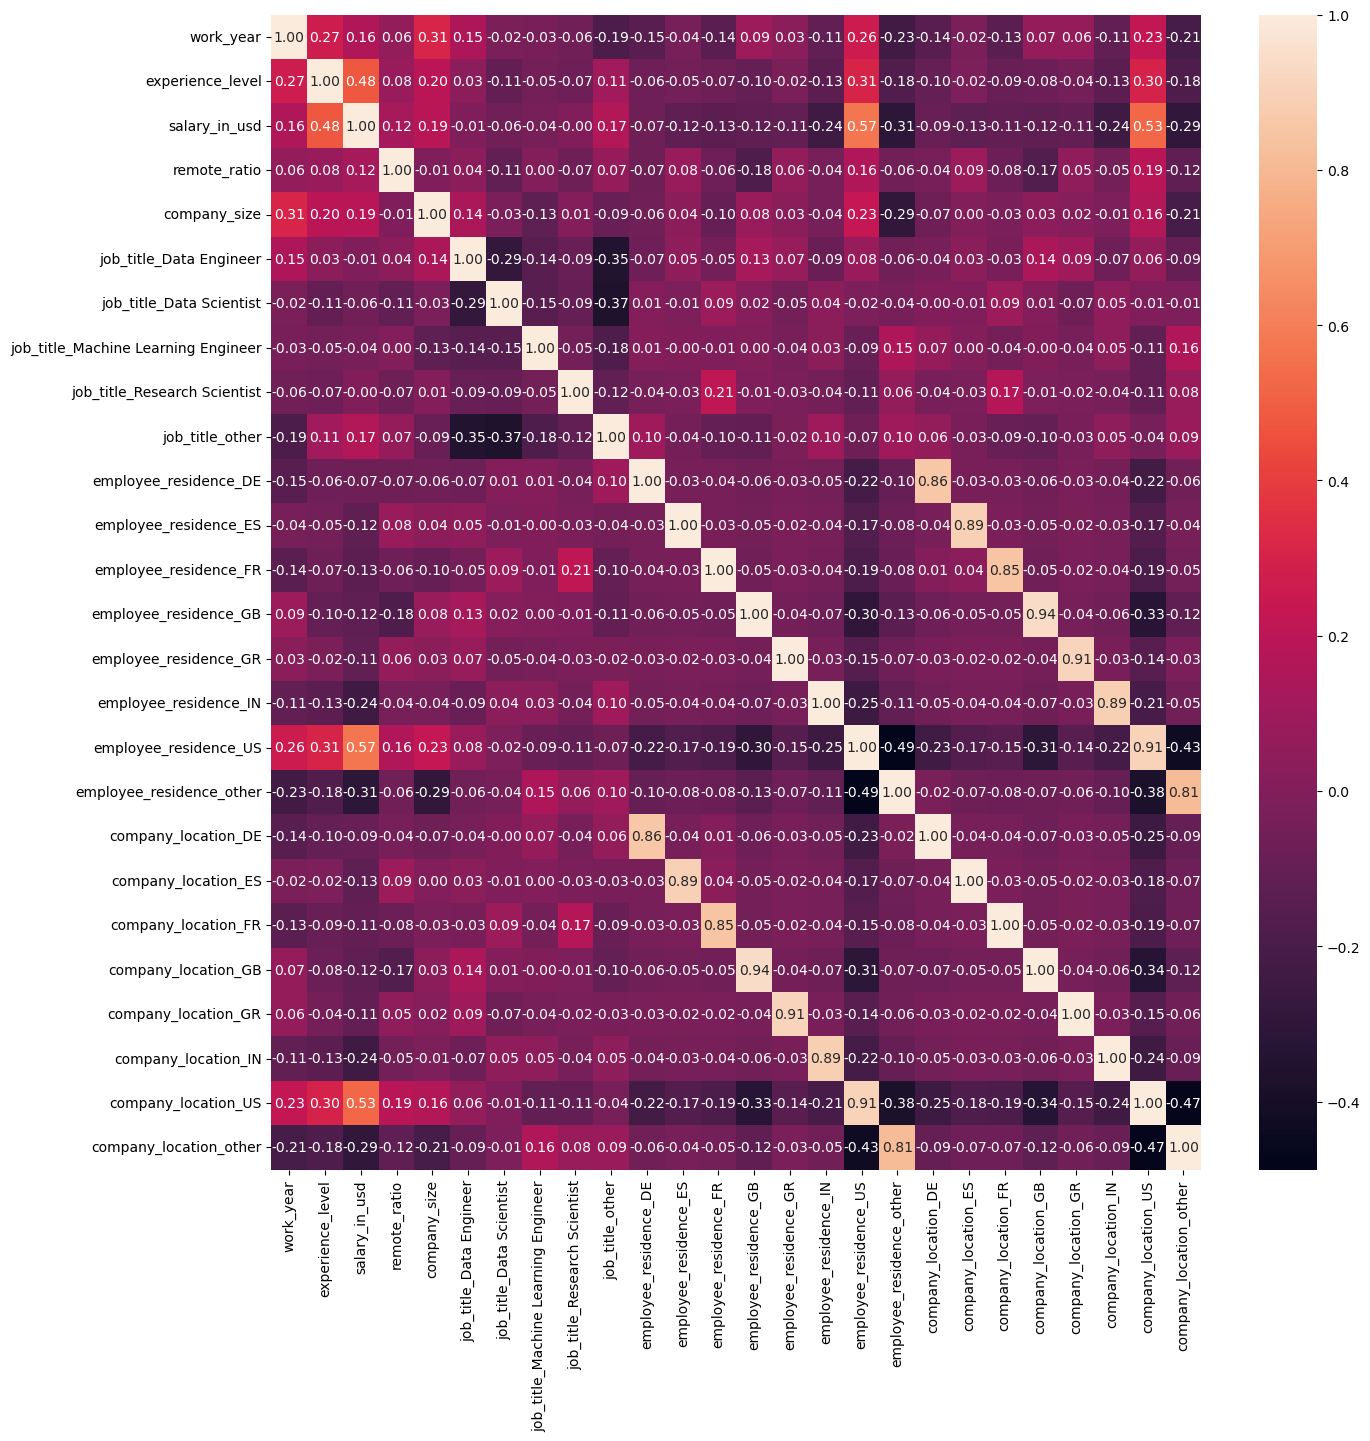

In [978]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt='.2f')

# split the data

In [981]:
x = df.drop("salary_in_usd", axis = 1)
y = df["salary_in_usd"]

In [983]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [985]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [1076]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.30, random_state=42)

In [1010]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [1012]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5246653447859786
0.4637179768940416


In [1014]:
y_pred = lr.predict(X_test)

In [995]:
lr.score(X_test, y_pred)

1.0

In [997]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

2497788109.526604
33970.04283146006


In [999]:
y_pred.mean() - y_test.mean()

550.9139656021143

## polynomial

In [1028]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)

In [1080]:
x_train_poly, x_test_poly, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25, random_state = 25)

In [1032]:
lr2 = LinearRegression()
lr2.fit(x_train_poly, y_train)

LinearRegression()

In [1034]:
y_pred = lr2.predict(x_test_poly)

In [1036]:
lr2.score(x_train_poly, y_train)

0.7813136718905324

In [1038]:
lr2.score(x_test_poly, y_test)

-24625427188.718437

In [125]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

1.0597130606221155e+29
29892825135207.87


# DecisionTreeRegressor

In [1084]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=55)

In [1058]:
y_pred.mean() - y_test.mean()

-2965.006743006452

In [1060]:
from sklearn import tree

In [1062]:
reg = tree.DecisionTreeRegressor(max_depth=7, min_samples_split=2)

In [1064]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [1066]:
y_pred = reg.predict(x_test)

In [1068]:
reg.score(x_train, y_train)

0.6895040978237865

In [1070]:
reg.score(x_test, y_test)

0.3694411887802993

In [1072]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

3552927521.6842265
38481.784089342036
